<a href="https://colab.research.google.com/github/gaurav15raj/Coursera-Machine-Learning-Python-/blob/master/AR_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm

#import other useful libraries 

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.tsa.arima_model import ARIMA


In this assignment, you will be using data from the real world (almost) to identify and predict the pattern in closing stock price of a company for each day in 2022. Load the dataset saved as **output.csv** in the github repo and do the following : 

a) Plot the acf and pacf graphs to identify the process and its order 
b) Use a linear regression model to find the coefficients of this process once you know the order 

**optional** : If you're unable to figure out the order in one go, play around with different lag values and check for the model that gives the best score. 
(use r2_score etc for this) 

**c) Create additional entries in the same dataframe which correspond to the first month of 2023 and then predict the closing stock price for each day of this month. Save your results in your github repo**



In [3]:
#load the dataset
url = 'https://raw.githubusercontent.com/gaurav15raj/Time_Series-Econs-/main/AR%20Processes/output.csv'
df = pd.read_csv(url)

In [76]:
from statsmodels.tsa.ar_model import AutoReg

# Create training and test data
#
train_data = df['Prices'][:len(df)-60]
test_data = df['Prices'][len(df)-60:]
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=3).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Prices   No. Observations:                  302
Model:                     AutoReg(3)   Log Likelihood                -442.158
Method:               Conditional MLE   S.D. of innovations              1.062
Date:                Tue, 07 Feb 2023   AIC                              0.153
Time:                        09:50:32   BIC                              0.215
Sample:                             3   HQIC                             0.178
                                  302                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.7937      5.242      3.776      0.000       9.520      30.068
Prices.L1      0.2717      0.051      5.295      0.000       0.171       0.372
Prices.L2      0.0678      0.053      1.273      0.2

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


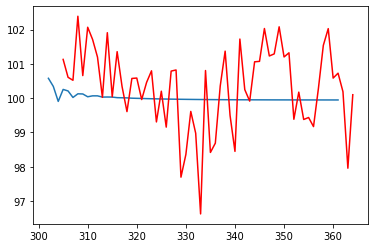

In [77]:
# Make the predictions
#
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
#
# Plot the prediction vs test data
#
from matplotlib import pyplot as plt
plt.plot(pred)
plt.plot(test_data, color='red')

In [ ]:
#not a great model!!

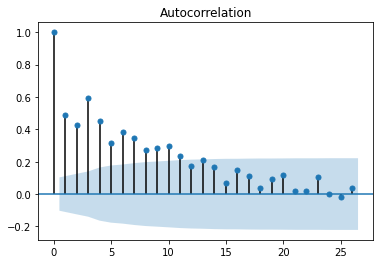

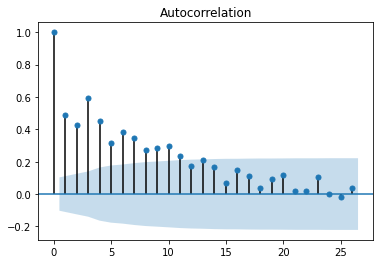

In [109]:
#plot the acf and pacf 
plot_acf(df['Prices'])

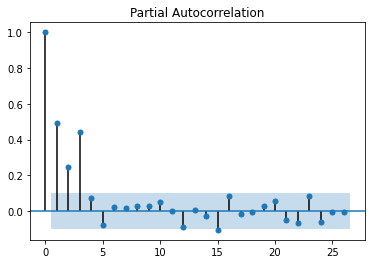

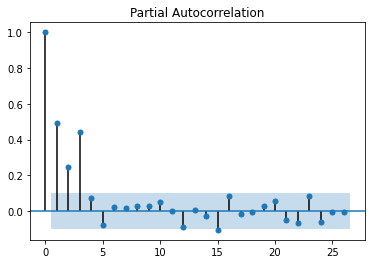

In [6]:
plot_pacf(df['Prices'])

In [30]:
#it looks like an AR Process of order 3, so we will train our regression till 3 lags 
df['Price_t1'] = df['Prices'].shift()
df['Price_t2'] = df['Price_t1'].shift()
df['Price_t3'] = df['Price_t2'].shift()


In [31]:
df.fillna(0)

,Date,Prices,Price_t1,Price_t2,Price_t3
0,2022-01-01,99.346617,0.000000,0.000000,0.000000
1,2022-01-02,99.563825,99.346617,0.000000,0.000000
2,2022-01-03,100.163220,99.563825,99.346617,0.000000
3,2022-01-04,99.841533,100.163220,99.563825,99.346617
4,2022-01-05,101.927683,99.841533,100.163220,99.563825
...,...,...,...,...,...
360,2022-12-27,100.584309,102.025734,101.538205,100.283840
361,2022-12-28,100.727467,100.584309,102.025734,101.538205
362,2022-12-29,100.187050,100.727467,100.584309,102.025734
363,2022-12-30,97.957102,100.187050,100.727467,100.584309


In [96]:

df.dropna(inplace=True)
y = df['Prices'].values
x = df[['Price_t1', 'Price_t2', 'Price_t3']].values
len(x)


362

In [98]:
test_train = int(len(x) * 0.80)


X_train, X_test = x[0:test_train], x[test_train:len(x)]
y_train, y_test = y[0:test_train], y[test_train:len(x)]
X_train = X_train.reshape(-1,3)
X_test = X_test.reshape(-1,3)


In [100]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [101]:
print(lr.coef_)
print(lr.intercept_)


[0.27419338 0.06956667 0.46114882]
19.505971351889386


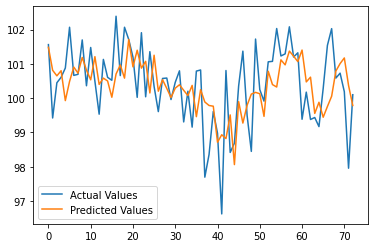

In [108]:
y_pred = lr.predict(X_test)


plt.plot(y_test, label="Actual Values")
plt.plot(y_pred, label="Predicted Values")
plt.legend()
plt.show()
     



     

In [103]:
r2_score(y_test, y_pred)

0.16380710278864363

In [110]:
#low r2 score, however, shows a good correlation with the actual graph